# Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.patches import Patch

# Lectura del dataset

In [2]:
df = pd.read_csv('laliga.csv', header=1)
df.columns = [ 'Season', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR']
df.head()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,2/9/1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H
1,1995-96,3/9/1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H
2,1995-96,3/9/1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D
3,1995-96,3/9/1995,Celta,Compostela,0,1,A,0.0,0.0,D
4,1995-96,3/9/1995,Espanol,Salamanca,3,1,H,2.0,1.0,H


# Preprocesado del dataset

In [3]:
# remove missing values from the dataset
df = df.dropna()

# columns HTHG and HTAG are shown as floats (3.0 instead of 3), convert them to integers
df['HTHG'] = df['HTHG'].astype(int)
df['HTAG'] = df['HTAG'].astype(int)

df.head()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,2/9/1995,Sp Gijon,Albacete,3,0,H,3,0,H
1,1995-96,3/9/1995,Ath Bilbao,Santander,4,0,H,2,0,H
2,1995-96,3/9/1995,Ath Madrid,Sociedad,4,1,H,1,1,D
3,1995-96,3/9/1995,Celta,Compostela,0,1,A,0,0,D
4,1995-96,3/9/1995,Espanol,Salamanca,3,1,H,2,1,H


# Visualizaciones

### Líneas

El objetivo de esta visualización será mostrar la importancia de las partes en el fútbol. ¿Dónde se marcan más goles? ¿En la primera o segunda mitad? ¿Dónde merece la pena hacer más esfuerzo?

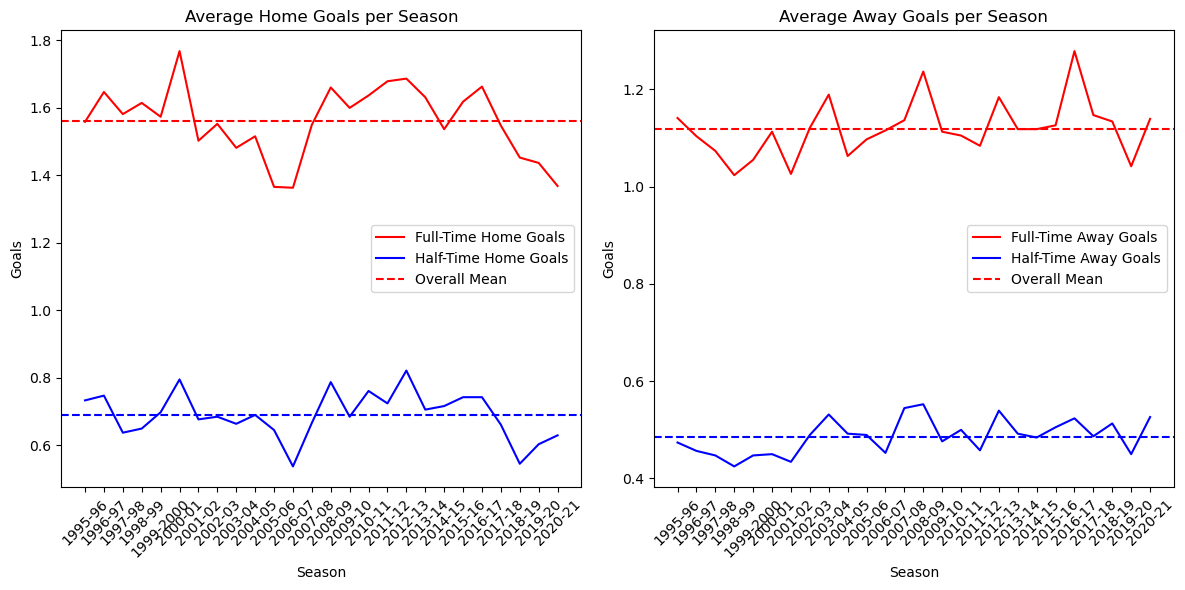

In [4]:
import matplotlib.pyplot as plt

# calculate the overall mean for each parameter
fthg_mean = df['FTHG'].mean()
htgh_mean = df['HTHG'].mean()
ftag_mean = df['FTAG'].mean()
htag_mean = df['HTAG'].mean()

# create a figure with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# plot the first graph in the top left corner
axs[0].plot(df.groupby('Season')['FTHG'].mean(), color='red')
axs[0].plot(df.groupby('Season')['HTHG'].mean(), color='blue')
axs[0].axhline(y=fthg_mean, color='red', linestyle='--')
axs[0].axhline(y=htgh_mean, color='blue', linestyle='--')
axs[0].legend(['Full-Time Home Goals', 'Half-Time Home Goals', 'Overall Mean'])
axs[0].set_title('Average Home Goals per Season')
axs[0].set_xlabel('Season')
axs[0].set_ylabel('Goals')

# rotate X labels on the first graph
axs[0].tick_params(axis='x', labelrotation=45)

# plot the second graph in the top right corner
axs[1].plot(df.groupby('Season')['FTAG'].mean(), color='red')
axs[1].plot(df.groupby('Season')['HTAG'].mean(), color='blue')
axs[1].axhline(y=ftag_mean, color='red', linestyle='--')
axs[1].axhline(y=htag_mean, color='blue', linestyle='--')
axs[1].legend(['Full-Time Away Goals', 'Half-Time Away Goals', 'Overall Mean'])
axs[1].set_title('Average Away Goals per Season')
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Goals')

# rotate X labels on the second graph
axs[1].tick_params(axis='x', labelrotation=45)

# adjust the spacing between the subplots
fig.tight_layout()

# display the plot
plt.show()


### Barras
El objetivo de esta visualización es mostrar la distribución de derrotas, empates y victorias por temporada del Sevilla FC

/var/folders/88/jrcknhqn5ws5h8bwstgvc48m0000gn/T/ipykernel_9271/1385360028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sevilla['Result'] = sevilla.apply(lambda x: 'W' if (x['HomeTeam'] == 'Sevilla' and x['FTR'] == 'H') or (x['AwayTeam'] == 'Sevilla' and x['FTR'] == 'A')


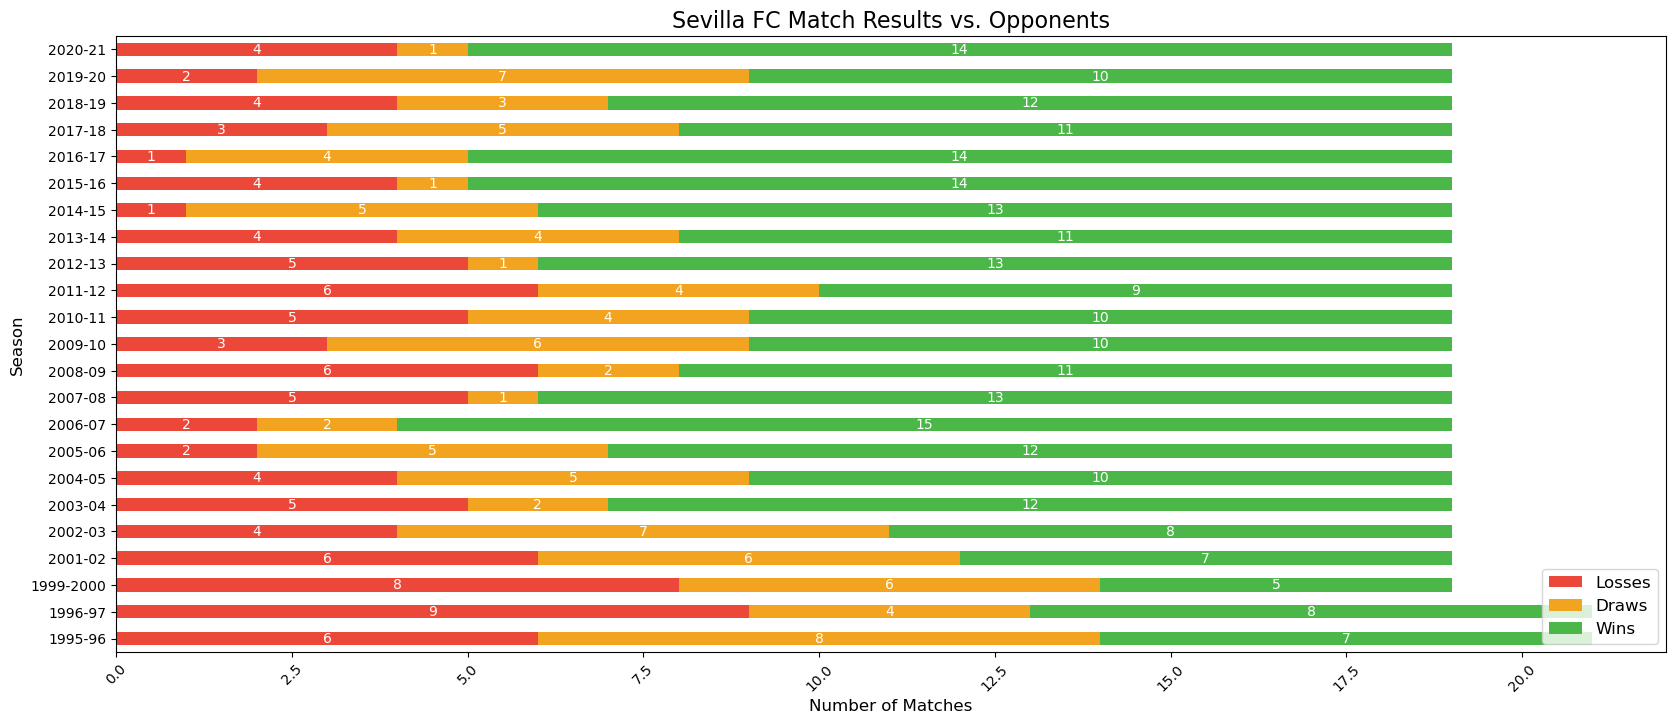

In [5]:
# create a subset of the DataFrame containing only matches where Sevilla FC played
sevilla = df[(df['HomeTeam'] == 'Sevilla') | (df['AwayTeam'] == 'Sevilla FC')]

# create a new column to represent the result of the match from Sevilla's point of view
sevilla['Result'] = sevilla.apply(lambda x: 'W' if (x['HomeTeam'] == 'Sevilla' and x['FTR'] == 'H') or (x['AwayTeam'] == 'Sevilla' and x['FTR'] == 'A')
                                    else ('L' if (x['HomeTeam'] == 'Sevilla' and x['FTR'] == 'A') or (x['AwayTeam'] == 'Sevilla' and x['FTR'] == 'H')
                                          else 'D'), axis=1)

# define the order of the result categories
result_order = ['L', 'D', 'W']

# count the number of wins, draws and losses every season and make a bar plot with the results
ax = sevilla.groupby(['Season', 'Result'])['Result'].count().unstack().reindex(columns=result_order).plot(kind='barh', stacked=True, figsize=(20,8), color=['#EC483A', '#F2A31F', '#4BB748'])

# set labels for the plot
ax.set_xlabel('Number of Matches', fontsize=12)
ax.set_ylabel('Season', fontsize=12)
ax.set_title('Sevilla FC Match Results vs. Opponents', fontsize=16)

# rotate X labels
plt.xticks(rotation=45)

# add annotations for each bar
for i, (l, d, w) in enumerate(zip(sevilla.groupby(['Season', 'Result'])['Result'].count().unstack().loc[:, 'L'],
                                   sevilla.groupby(['Season', 'Result'])['Result'].count().unstack().loc[:, 'D'],
                                   sevilla.groupby(['Season', 'Result'])['Result'].count().unstack().loc[:, 'W'])):
    plt.text(l/2, i, str(l), ha='center', va='center', color='white', fontsize=10)
    plt.text(l+d/2, i, str(d), ha='center', va='center', color='white', fontsize=10)
    plt.text(l+d+w/2, i, str(w), ha='center', va='center', color='white', fontsize=10)
    
# add a legend
ax.legend(['Losses', 'Draws', 'Wins'], loc='lower right', fontsize=12)

# display the plot
plt.show()


### Boxplot
El objetivo de esta visualización es mostrar, en base a una métrica que he creado de rendimiento, que tiene en cuenta victorias y goles, mostrar la distribución del rendimiento del Barcelona comparado con los top 7 equipos cada año durante todas las temporadas

In [6]:
df['Points'] = df.apply(lambda row: 3 if row['FTR'] == 'H' else 1 if row['FTR'] == 'D' else 0, axis=1)
team_points = df.groupby(['Season', 'HomeTeam'])['Points'].sum().reset_index()
opp_points = df.groupby(['Season', 'AwayTeam'])['Points'].sum().reset_index()
team_points = team_points.rename(columns={'HomeTeam': 'Team'})
opp_points = opp_points.rename(columns={'AwayTeam': 'Team'})
points = pd.concat([team_points, opp_points])
games_played = df.groupby(['Season', 'HomeTeam'])['FTHG'].count().reset_index()
games_played = games_played.rename(columns={'HomeTeam': 'Team', 'FTHG': 'GamesPlayed'})
points = pd.merge(points, games_played, on=['Season', 'Team'])
points['OppPoints'] = points['Points'] + (3 * (points['GamesPlayed'] - (points['Points'] / 3)))
points['GoalsFor'] = df.groupby(['Season', 'HomeTeam'])['FTHG'].sum().reset_index()['FTHG']
points['GoalsAgainst'] = df.groupby(['Season', 'HomeTeam'])['FTAG'].sum().reset_index()['FTAG']
points['GoalDifference'] = points['GoalsFor'] - points['GoalsAgainst']
points['Win'] = points['Points'] / 3
points['Draw'] = (points['GamesPlayed'] - points['Points']) / 3
points['Loss'] = (points['GamesPlayed'] - points['Win'] - points['Draw'])
points['PerformanceMetric'] = (3 * points['Win'] + points['Draw']) / points['GamesPlayed']

def get_top_teams(df, season):
    top_teams = df[df['Season'] == season].sort_values(by=['PerformanceMetric'], ascending=False).head(8)
    top_teams = top_teams[top_teams['Team'] != 'Barcelona']
    return top_teams

top_teams_by_season = {}
for season in df['Season'].unique():
    top_teams_by_season[season] = get_top_teams(points, season)

# get top_teams_by_season.keys() from elements 5 to last -2
negreira_seasons = list(top_teams_by_season.keys())[5:-2]


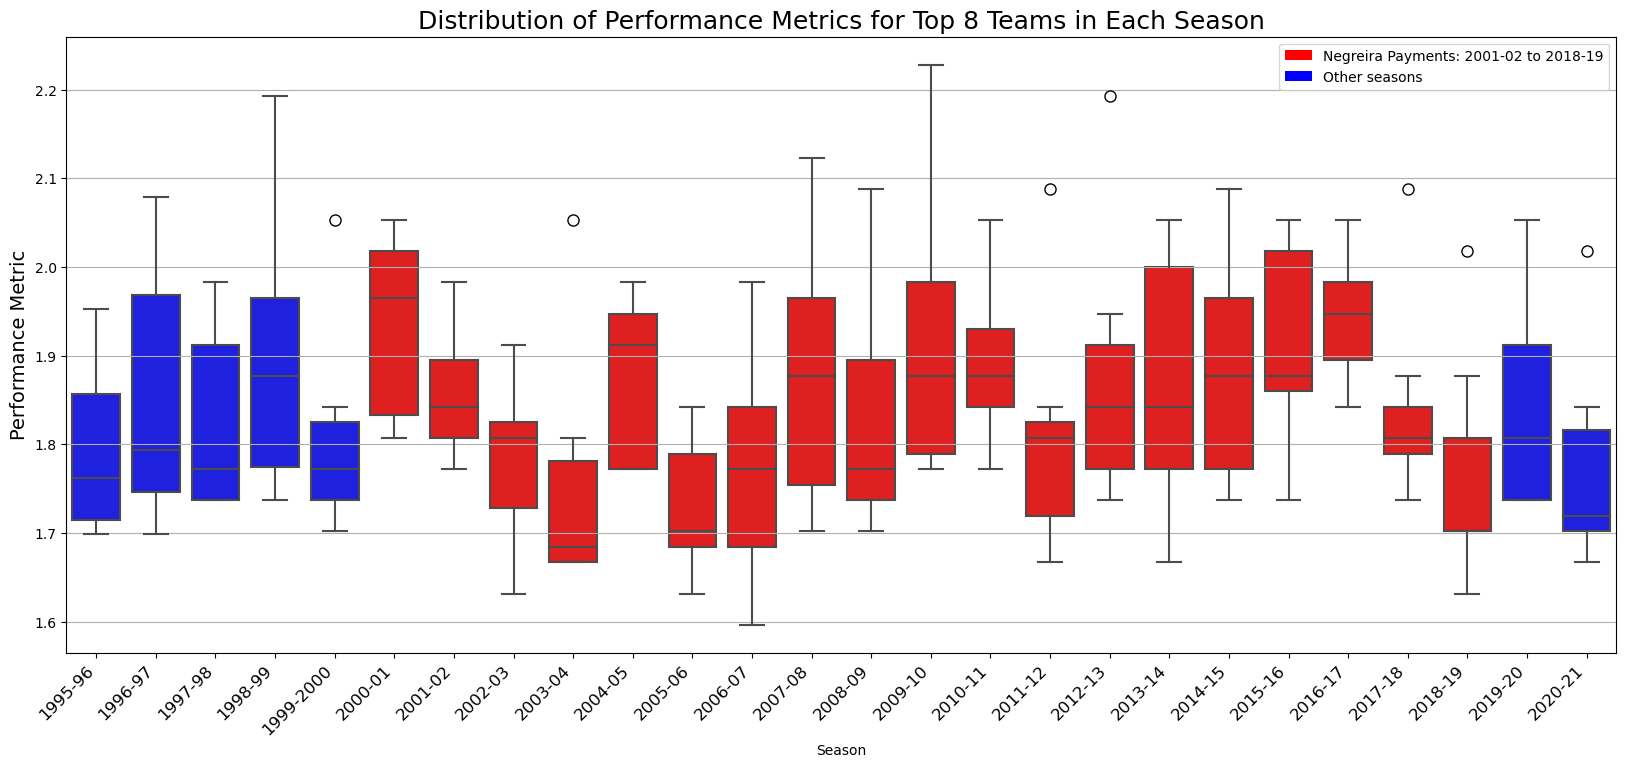

In [7]:
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x='Season', y='PerformanceMetric', data=pd.concat(top_teams_by_season.values()), palette=['red' if season in negreira_seasons else 'blue' for season in top_teams_by_season.keys()], flierprops=dict(marker='o', markersize=8, markerfacecolor='white', markeredgecolor='black'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_ylabel('Performance Metric', fontsize=14)
ax.set_title('Distribution of Performance Metrics for Top 8 Teams in Each Season', fontsize=18)
ax.grid(axis='y')
plt.legend(handles=[Patch(facecolor='red', label='Negreira Payments: 2001-02 to 2018-19'), Patch(facecolor='blue', label='Other seasons')])
plt.show()